<a href="https://colab.research.google.com/github/aliashanavas/PROJECTS/blob/main/MLproject_Socialmedia_addiction_prediction_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix,precision_score,recall_score,f1_score

In [4]:
df = pd.read_csv("socialmedia.csv")

In [5]:
df.head()

,User ID,Age,Gender,Country,Daily Social Media Time (hrs),Daily Entertainment Time (hrs),Social Media Platforms Used,Primary Platform,Daily Messaging Time (hrs),Daily Video Content Time (hrs),...,Ad Interaction Count,Time on Educational Platforms (hrs),Parental Status,Tech Savviness Level (scale 1-10),Preferred Device for Entertainment,Data Plan Used,Digital Well-being Awareness,Sleep Quality (scale 1-10),Social Isolation Feeling (scale 1-10),Monthly Expenditure on Entertainment (USD)
0,4942,35,Male,Germany,3.24,3.01,5.0,TikTok,3.48,2.68,...,44.0,3.67,Yes,5.0,Smartphone,10GB,Low,1.0,4.0,196.62
1,51776,53,Female,Canada,5.31,0.87,4.0,TikTok,1.23,0.83,...,16.0,3.68,Yes,4.0,Smartphone,Unlimited,Low,6.0,6.0,359.32
2,115254,39,Female,USA,2.89,3.93,2.0,TikTok,0.71,5.19,...,30.0,0.76,Yes,2.0,PC,Unlimited,High,3.0,4.0,309.52
3,299322,24,Female,USA,4.51,1.14,4.0,Facebook,0.64,4.40,...,43.0,0.75,Yes,9.0,Tablet,50GB,Low,1.0,9.0,446.42
4,173571,32,Male,Germany,7.58,4.28,5.0,Twitter,4.51,3.02,...,42.0,1.87,No,7.0,Tablet,Unlimited,High,7.0,5.0,113.32


In [6]:
df.tail()

,User ID,Age,Gender,Country,Daily Social Media Time (hrs),Daily Entertainment Time (hrs),Social Media Platforms Used,Primary Platform,Daily Messaging Time (hrs),Daily Video Content Time (hrs),...,Ad Interaction Count,Time on Educational Platforms (hrs),Parental Status,Tech Savviness Level (scale 1-10),Preferred Device for Entertainment,Data Plan Used,Digital Well-being Awareness,Sleep Quality (scale 1-10),Social Isolation Feeling (scale 1-10),Monthly Expenditure on Entertainment (USD)
68439,199365,28,Male,Australia,0.71,2.49,5.0,Facebook,2.53,0.76,...,37.0,2.21,No,2.0,Smartphone,50GB,Low,2.0,6.0,353.02
68440,45716,63,Female,USA,7.65,3.47,3.0,Twitter,3.45,2.72,...,24.0,3.60,Yes,6.0,PC,10GB,Moderate,7.0,1.0,122.36
68441,28773,27,Female,Germany,4.24,9.75,5.0,Twitter,4.11,6.76,...,24.0,4.08,Yes,1.0,Smartphone,Unlimited,Low,8.0,3.0,455.85
68442,39903,23,Female,Germany,2.58,1.70,5.0,Instagram,2.90,1.46,...,8.0,1.80,No,5.0,Smart TV,Unlimited,High,4.0,1.0,39.13
68443,33984,31,F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
df.columns

Index(['User ID', 'Age', 'Gender', 'Country', 'Daily Social Media Time (hrs)',
       'Daily Entertainment Time (hrs)', 'Social Media Platforms Used',
       'Primary Platform', 'Daily Messaging Time (hrs)',
       'Daily Video Content Time (hrs)', 'Daily Gaming Time (hrs)',
       'Occupation', 'Marital Status', 'Monthly Income (USD)', 'Device Type',
       'Internet Speed (Mbps)', 'Subscription Platforms',
       'Average Sleep Time (hrs)', 'Physical Activity Time (hrs)',
       'Reading Time (hrs)', 'Work/Study Time (hrs)', 'Screen Time (hrs)',
       'Notifications Received Daily', 'Daily Music Listening Time (hrs)',
       'Preferred Content Type', 'Primary Social Media Goal',
       'Preferred Entertainment Platform',
       'Time Spent in Online Communities (hrs)',
       'Social Media Fatigue Level (scale 1-10)',
       'News Consumption Time (hrs)', 'Ad Interaction Count',
       'Time on Educational Platforms (hrs)', 'Parental Status',
       'Tech Savviness Level (scale 1-10

In [8]:
df.isna().sum()

,0
User ID,0
Age,0
Gender,0
Country,1
Daily Social Media Time (hrs),1
Daily Entertainment Time (hrs),1
Social Media Platforms Used,1
Primary Platform,1
Daily Messaging Time (hrs),1
Daily Video Content Time (hrs),1


In [9]:
df.dtypes

,0
User ID,int64
Age,int64
Gender,object
Country,object
Daily Social Media Time (hrs),float64
Daily Entertainment Time (hrs),float64
Social Media Platforms Used,float64
Primary Platform,object
Daily Messaging Time (hrs),float64
Daily Video Content Time (hrs),float64


In [10]:

df.duplicated().sum()

np.int64(0)

In [11]:
df.drop(['User ID','Country', 'Marital Status','Device Type',
       'Internet Speed (Mbps)','Parental Status','Data Plan Used','Preferred Device for Entertainment'],inplace=True,axis=1)

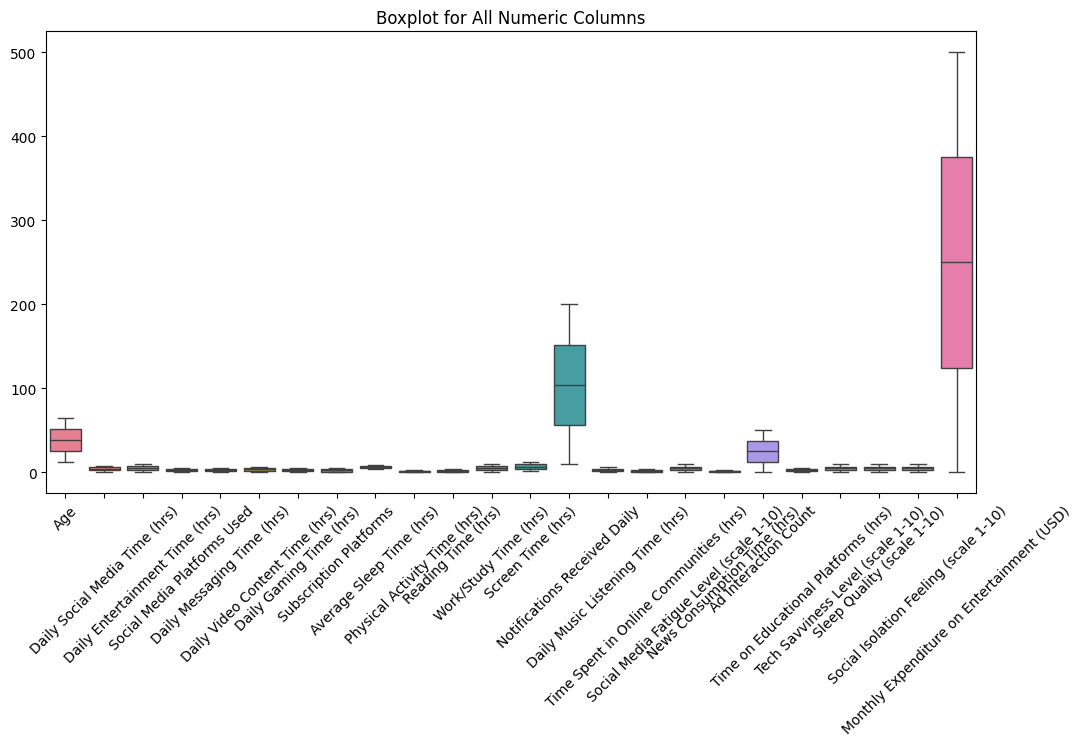

In [12]:
numeric_cols = df.select_dtypes(include=["number"]).drop(columns=["Monthly Income (USD)"])
plt.figure(figsize=(12, 6))
sns.boxplot(data=numeric_cols)
plt.xticks(rotation=45)
plt.title("Boxplot for All Numeric Columns")
plt.show()

In [13]:
print(df[['Ad Interaction Count', 'Notifications Received Daily','Monthly Expenditure on Entertainment (USD)']].describe(percentiles=[0.01, 0.25, 0.50, 0.75, 0.99]))


       Ad Interaction Count  Notifications Received Daily  \
count          68443.000000                  68443.000000   
mean              24.586970                    104.466373   
std               14.414107                     54.934400   
min                0.000000                     10.000000   
1%                 0.000000                     12.000000   
25%               12.000000                     57.000000   
50%               25.000000                    104.000000   
75%               37.000000                    152.000000   
99%               49.000000                    198.000000   
max               50.000000                    200.000000   

       Monthly Expenditure on Entertainment (USD)  
count                                68443.000000  
mean                                   250.169881  
std                                    144.451643  
min                                      0.020000  
1%                                       5.010000  
25%             

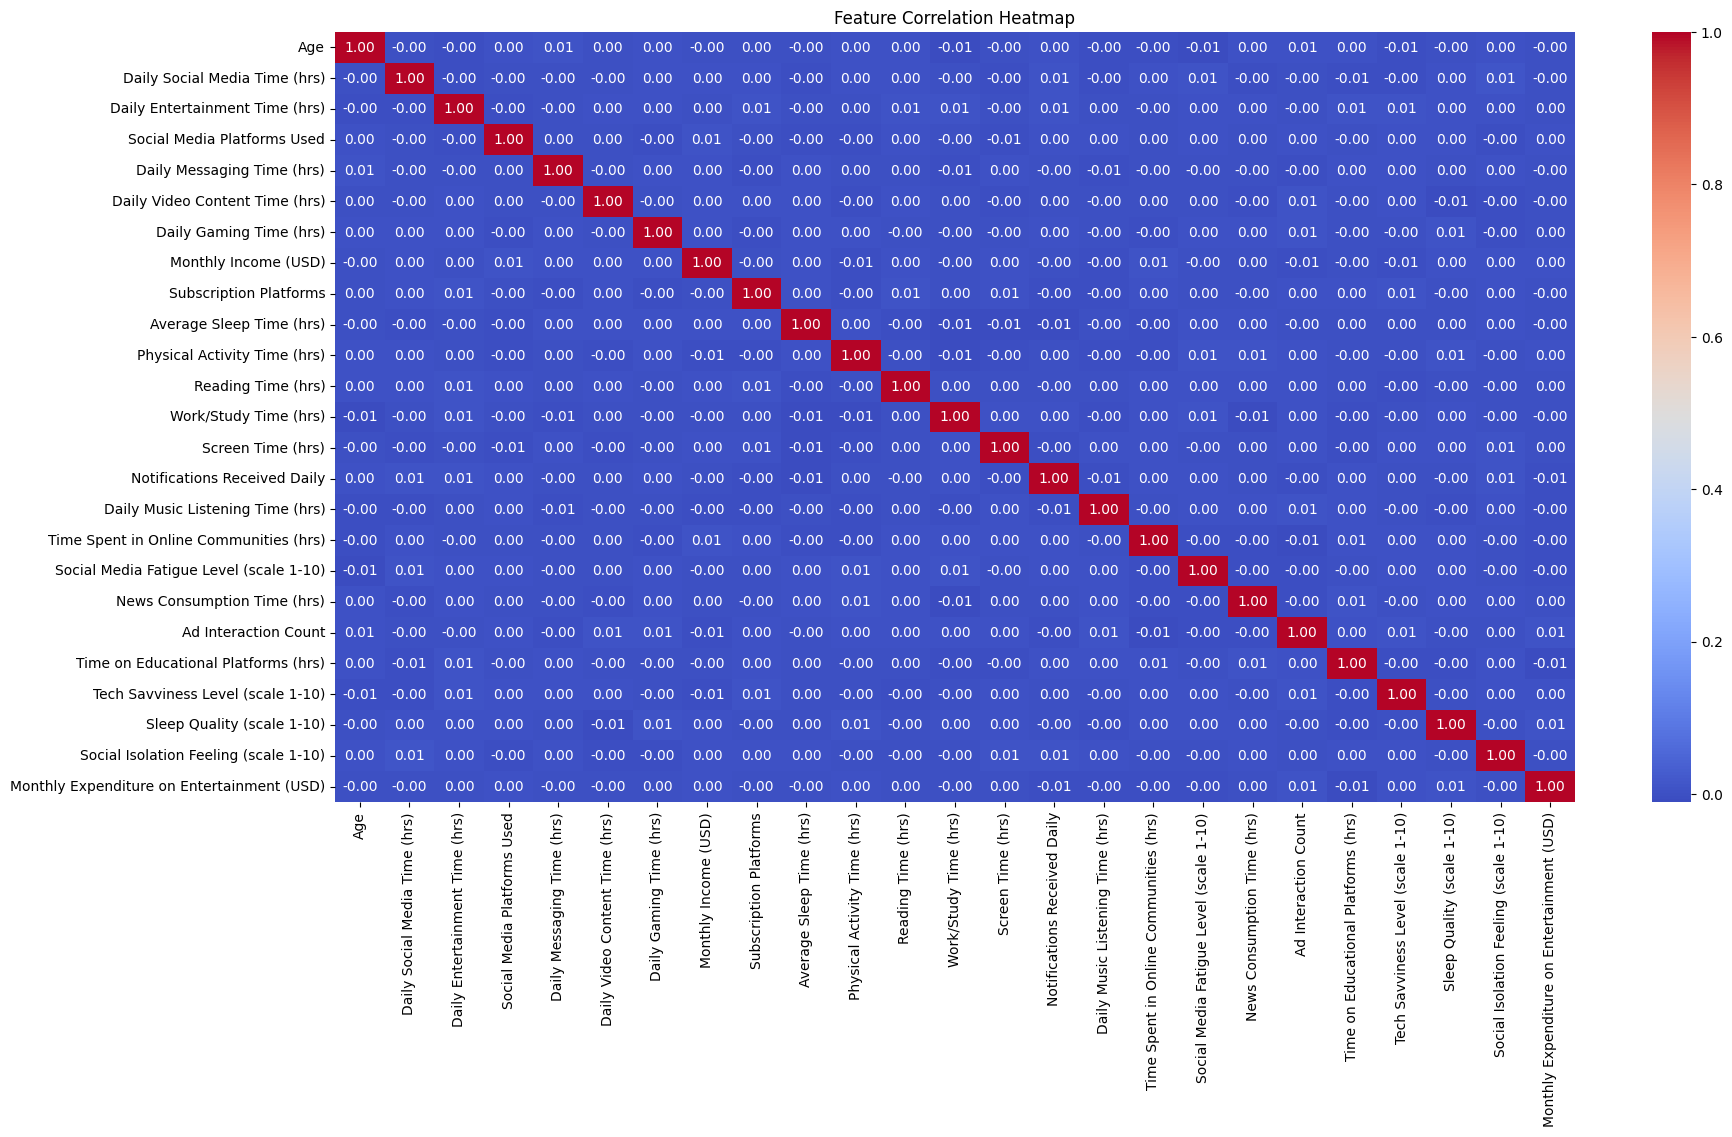

In [14]:

numeric_df = df.select_dtypes(include=['number'])
plt.figure(figsize=(20,10))
sns.heatmap(numeric_df.corr() ,annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

In [15]:
correlation_matrix = df.corr(numeric_only=True)
correlation_pairs = correlation_matrix.unstack().sort_values(ascending=False)
correlation_pairs = correlation_pairs[correlation_pairs < 1]
print(correlation_pairs.head(10))

Social Isolation Feeling (scale 1-10)    Daily Social Media Time (hrs)              0.010074
Daily Social Media Time (hrs)            Social Isolation Feeling (scale 1-10)      0.010074
Ad Interaction Count                     Daily Gaming Time (hrs)                    0.008177
Daily Gaming Time (hrs)                  Ad Interaction Count                       0.008177
Social Media Fatigue Level (scale 1-10)  Work/Study Time (hrs)                      0.007921
Work/Study Time (hrs)                    Social Media Fatigue Level (scale 1-10)    0.007921
Subscription Platforms                   Daily Entertainment Time (hrs)             0.007914
Daily Entertainment Time (hrs)           Subscription Platforms                     0.007914
Sleep Quality (scale 1-10)               Daily Gaming Time (hrs)                    0.007887
Daily Gaming Time (hrs)                  Sleep Quality (scale 1-10)                 0.007887
dtype: float64


In [16]:
primary_plaform=df["Primary Platform"].value_counts()
primary_plaform

,count
Primary Platform,
Instagram,13852
Facebook,13769
TikTok,13708
Twitter,13595
YouTube,13519


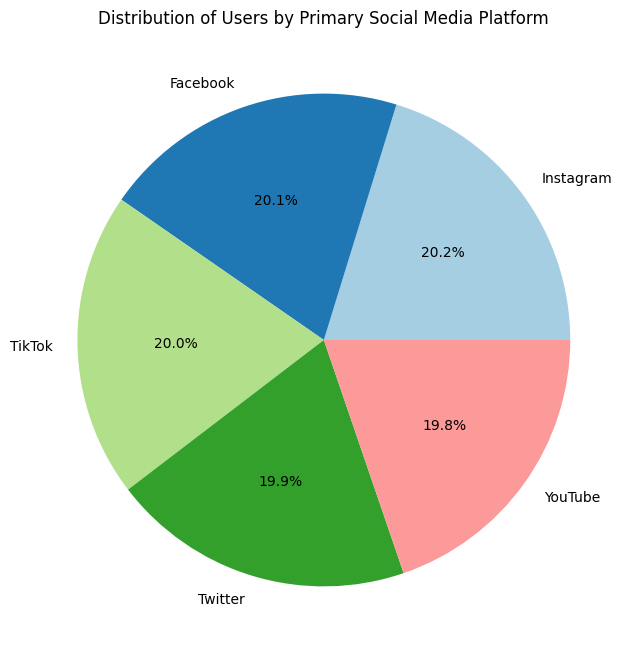

In [17]:
plt.figure(figsize=(8, 8))
plt.pie(primary_plaform, labels=primary_plaform.index, autopct='%1.1f%%',colors=plt.cm.Paired.colors  )

plt.title("Distribution of Users by Primary Social Media Platform")
plt.show()

In [18]:
content_preferred=df["Preferred Content Type"].value_counts()
content_preferred

,count
Preferred Content Type,
Movies,17292
Short Videos,17271
Series,16951
News,16929


Text(0.5, 1.0, 'Distribution of Users by preferred Content Type')

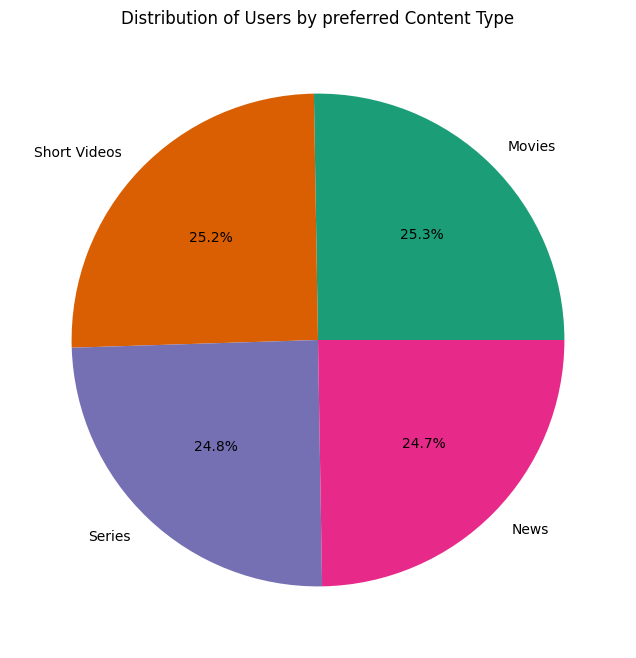

In [19]:
plt.figure(figsize=(8,8))
plt.pie(content_preferred,labels=content_preferred.index,autopct="%1.1f%%",colors=plt.cm.Dark2.colors)
plt.title("Distribution of Users by preferred Content Type")

In [20]:
entertainmentplatform_preferred=df["Preferred Entertainment Platform"].value_counts()

([<matplotlib.patches.Wedge at 0x7b43f13ae550>,
 [Text(0.7759854946786326, 0.77964511930003, 'Spotify'),
  Text(-0.7826135835124491, 0.7729915775102617, 'Netflix'),
  Text(-0.7718230988919256, -0.7837659752865425, 'YouTube'),
  Text(0.7808020950648656, -0.7748213267214039, 'Amazon Prime')],
 [Text(0.42326481527925414, 0.42526097416365266, '25.1%'),
  Text(-0.4268801364613358, 0.4216317695510518, '25.0%'),
  Text(-0.4209944175774139, -0.4275087137926595, '25.0%'),
  Text(0.42589205185356305, -0.4226298145753112, '24.9%')])

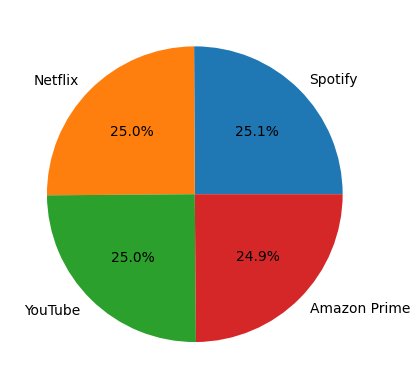

In [21]:
plt.pie(x=entertainmentplatform_preferred,labels=entertainmentplatform_preferred.index,autopct="%1.1f%%")

In [22]:
socialmedia_goal=df["Primary Social Media Goal"].value_counts()

([<matplotlib.patches.Wedge at 0x7b43f0db1750>,
 [Text(0.7714994992881801, 0.7840845124079977, 'News'),
  Text(-0.790484624684677, 0.7649405585646022, 'Entertainment'),
  Text(-0.7649588992620702, -0.7904668762445155, 'Networking'),
  Text(0.7840667252226108, -0.771517576208534, 'Education')],
 [Text(0.42081790870264363, 0.4276824613134532, '25.3%'),
  Text(-0.43117343164618743, 0.41724030467160117, '25.0%'),
  Text(-0.41725030868840185, -0.43116375067882656, '25.0%'),
  Text(0.4276727592123331, -0.4208277688410185, '24.7%')])

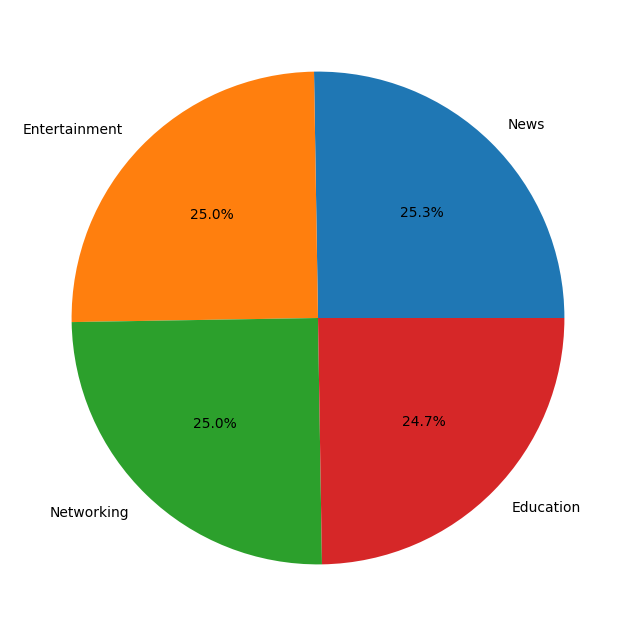

In [23]:
plt.figure(figsize=(8, 8))
plt.pie(socialmedia_goal,labels=socialmedia_goal.index, autopct='%1.1f%%' )

In [24]:
wellbeing_awareness=df["Digital Well-being Awareness"].value_counts()
print(wellbeing_awareness)

Digital Well-being Awareness
Low         22895
Moderate    22833
High        22715
Name: count, dtype: int64


<BarContainer object of 3 artists>

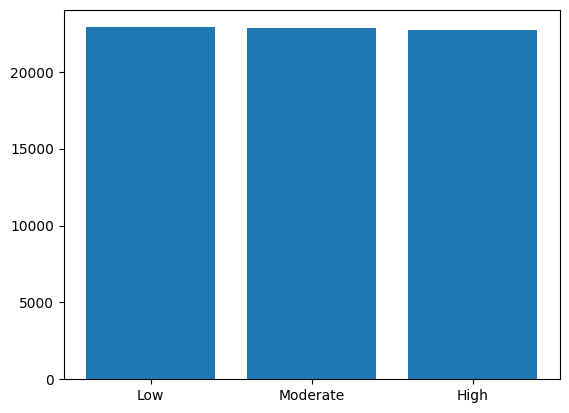

In [25]:
plt.bar(x=wellbeing_awareness.index,height=wellbeing_awareness.values)

In [26]:
# Encode Digital Well-being Awareness
lab= LabelEncoder()
df["Digital Well-being Awareness"] = lab.fit_transform(df["Digital Well-being Awareness"])

In [27]:
df["Engagement Ratio"] = df["Daily Social Media Time (hrs)"] / df["Screen Time (hrs)"]
df["Messaging vs. Social Ratio"] = df["Daily Messaging Time (hrs)"] / df["Daily Social Media Time (hrs)"]
df["Fatigue & Isolation Impact"] = df["Social Isolation Feeling (scale 1-10)"] * df["Social Media Fatigue Level (scale 1-10)"]
df["Sleep Disruption Score"] = (10 - df["Sleep Quality (scale 1-10)"]) * df["Daily Social Media Time (hrs)"]
df["Ad Interaction Rate"] = df["Ad Interaction Count"] / df["Daily Social Media Time (hrs)"]
df["Notification Dependency"] = df["Notifications Received Daily"] / df["Daily Social Media Time (hrs)"]

In [28]:
df["Addiction Score"] = (
    df["Engagement Ratio"] * 0.25 +
    df["Messaging vs. Social Ratio"] * 0.15 +
    df["Fatigue & Isolation Impact"] * 0.2 +
    df["Sleep Disruption Score"] * 0.15 +
    df["Ad Interaction Rate"] * 0.1 +
    df["Notification Dependency"] * 0.15
)

In [29]:

low_threshold = df["Addiction Score"].quantile(0.33)
moderate_threshold = df["Addiction Score"].quantile(0.66)

df["Social Media Addiction"] = np.select(
[df["Addiction Score"] < low_threshold, df["Addiction Score"] < moderate_threshold], ["Low", "Moderate"],default="High"
)

In [30]:
addiction_mapping = {"Low": 0, "Moderate": 1, "High": 2}

df["Social Media Addiction"] = df["Social Media Addiction"].map(addiction_mapping)

In [31]:
from sklearn.preprocessing import OneHotEncoder
categorical_cols=["Gender","Preferred Content Type","Primary Social Media Goal","Preferred Entertainment Platform","Primary Platform","Occupation"]
encoder = OneHotEncoder(sparse_output=False, drop="first")
encoded_data = encoder.fit_transform(df[categorical_cols])


In [32]:
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(categorical_cols))

df = pd.concat([df.drop(columns=categorical_cols), encoded_df], axis=1)

In [33]:
corr_matrix = df.corr()
correlation_with_addiction = corr_matrix["Social Media Addiction"].sort_values(ascending=False)

print(correlation_with_addiction)

Social Media Addiction                        1.000000
Addiction Score                               0.773158
Fatigue & Isolation Impact                    0.611790
Notification Dependency                       0.469873
Social Isolation Feeling (scale 1-10)         0.410612
Social Media Fatigue Level (scale 1-10)       0.409232
Notifications Received Daily                  0.373602
Ad Interaction Rate                           0.298726
Messaging vs. Social Ratio                    0.276507
Sleep Disruption Score                        0.070534
Ad Interaction Count                          0.062692
Daily Messaging Time (hrs)                    0.012028
Work/Study Time (hrs)                         0.008377
Daily Entertainment Time (hrs)                0.006677
Daily Music Listening Time (hrs)              0.006202
Preferred Content Type_Short Videos           0.005503
Gender_Other                                  0.005027
Preferred Content Type_nan                    0.004623
Primary So

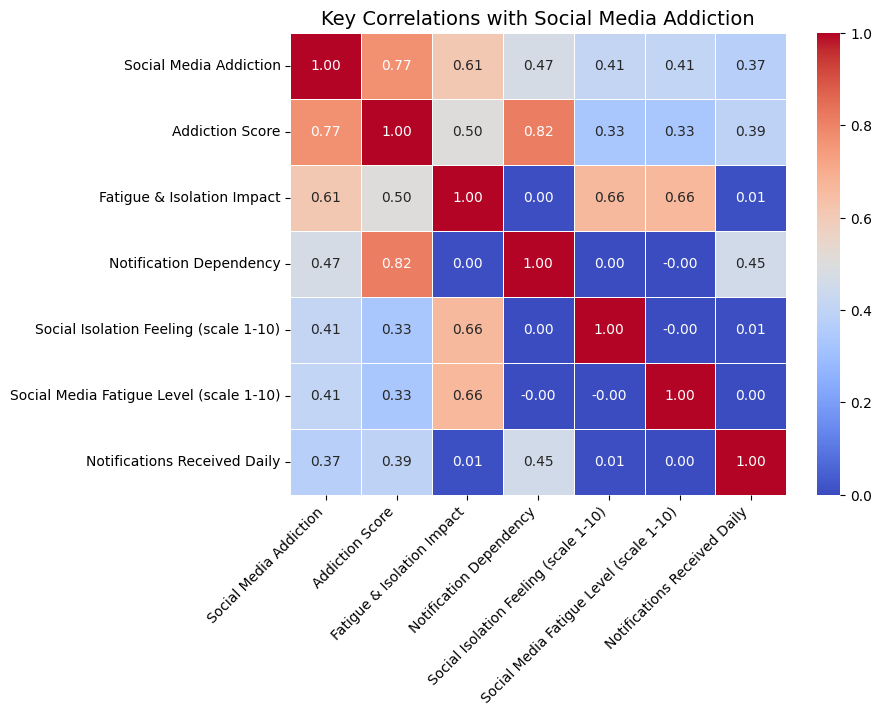

In [34]:
correlation_matrix = df.corr()
social_media_corr = correlation_matrix["Social Media Addiction"].sort_values(ascending=False)

strong_corr_features = social_media_corr[abs(social_media_corr) > 0.3].index
plt.figure(figsize=(8, 6))
sns.heatmap(df[strong_corr_features].corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Key Correlations with Social Media Addiction", fontsize=14)
plt.xticks(rotation=45, ha="right")
plt.show()

In [35]:
selected_features = ["Notifications Received Daily", "Ad Interaction Count",
"Daily Social Media Time (hrs)", "Social Media Fatigue Level (scale 1-10)",
"Social Media Platforms Used", "Daily Messaging Time (hrs)","Digital Well-being Awareness","Sleep Quality (scale 1-10)",
"Social Isolation Feeling (scale 1-10)", "Screen Time (hrs)"]

In [36]:
x=df[selected_features]
x

,Notifications Received Daily,Ad Interaction Count,Daily Social Media Time (hrs),Social Media Fatigue Level (scale 1-10),Social Media Platforms Used,Daily Messaging Time (hrs),Digital Well-being Awareness,Sleep Quality (scale 1-10),Social Isolation Feeling (scale 1-10),Screen Time (hrs)
0,74.0,44.0,3.24,4.0,5.0,3.48,1,1.0,4.0,3.48
1,22.0,16.0,5.31,9.0,4.0,1.23,1,6.0,6.0,4.01
2,65.0,30.0,2.89,3.0,2.0,0.71,0,3.0,4.0,7.15
3,133.0,43.0,4.51,9.0,4.0,0.64,1,1.0,9.0,5.83
4,160.0,42.0,7.58,3.0,5.0,4.51,0,7.0,5.0,6.49
...,...,...,...,...,...,...,...,...,...,...
68439,90.0,37.0,0.71,7.0,5.0,2.53,1,2.0,6.0,8.12
68440,25.0,24.0,7.65,2.0,3.0,3.45,2,7.0,1.0,6.21
68441,22.0,24.0,4.24,7.0,5.0,4.11,1,8.0,3.0,3.43
68442,22.0,8.0,2.58,4.0,5.0,2.90,0,4.0,1.0,5.13


In [37]:
y=df['Social Media Addiction']
y

,Social Media Addiction
0,1
1,1
2,0
3,2
4,0
...,...
68439,2
68440,0
68441,0
68442,0


In [38]:
y.value_counts()

,count
Social Media Addiction,
2,23272
1,22586
0,22586


In [39]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [40]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [41]:
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier(max_depth=10, random_state=42)

# Train the model
dt_model.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=10, random_state=42)

In [49]:
# Predictions
y_pred_train_df = dt_model.predict(x_train)
y_pred_test_df = dt_model.predict(x_test)

# Accuracy
train_accuracy = accuracy_score(y_train, y_pred_train_df)
test_accuracy = accuracy_score(y_test, y_pred_test_df)

print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Testing Accuracy: {test_accuracy:.4f}")

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_test_df))

# Confusion Matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_test_df))

Training Accuracy: 0.9084
Testing Accuracy: 0.8822

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.91      0.91      4550
           1       0.81      0.83      0.82      4471
           2       0.93      0.91      0.92      4668

    accuracy                           0.88     13689
   macro avg       0.88      0.88      0.88     13689
weighted avg       0.88      0.88      0.88     13689


Confusion Matrix:
[[4131  418    1]
 [ 431 3718  322]
 [   2  438 4228]]


In [51]:
rf = RandomForestClassifier(n_estimators=200,random_state=42, max_depth=10, min_samples_split=5)
rf.fit(x_train, y_train)
y_test_pred_rf = rf.predict(x_test)
y_train_pred_rf = rf.predict(x_train)

In [52]:
train_accuracy = accuracy_score(y_train, ytrain_pred_rf)

rf_accuracy = accuracy_score(y_test, y_test_pred_rf)
print(f"testAccuracy: {rf_accuracy:.4f}")
print(f"rf train accuracy: {train_accuracy}")

testAccuracy: 0.9127
rf train accuracy: 0.9404072687425806


In [53]:
# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_test_pred_rf ))

# Confusion Matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_test_pred_rf ))


Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.93      0.93      4550
           1       0.86      0.88      0.87      4471
           2       0.94      0.93      0.94      4668

    accuracy                           0.91     13689
   macro avg       0.91      0.91      0.91     13689
weighted avg       0.91      0.91      0.91     13689


Confusion Matrix:
[[4222  328    0]
 [ 272 3935  264]
 [   0  331 4337]]


In [54]:
xgb_model = XGBClassifier(objective="multi:softmax", num_class=3, random_state=42)
xgb_model.fit(x_train,y_train)
ytest_pred_xgb = rf.predict(x_test)
ytrain_pred_xgb = rf.predict(x_train)

In [55]:
train_accuracy = accuracy_score(y_train, ytrain_pred_xgb)
test_accuracy = accuracy_score(y_test, ytest_pred_xgb)
print(f"test Accuracy: {test_accuracy:.4f}")
print(f"train accuracy: {train_accuracy}")

test Accuracy: 0.9127
train accuracy: 0.9404072687425806


In [56]:
# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, ytest_pred_xgb))

# Confusion Matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, ytest_pred_xgb ))


Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.93      0.93      4550
           1       0.86      0.88      0.87      4471
           2       0.94      0.93      0.94      4668

    accuracy                           0.91     13689
   macro avg       0.91      0.91      0.91     13689
weighted avg       0.91      0.91      0.91     13689


Confusion Matrix:
[[4222  328    0]
 [ 272 3935  264]
 [   0  331 4337]]
